In [2]:
import pandas as pd 
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt 

In [3]:
df_train = pd.read_csv("Train.csv")
df_train.isnull().sum()/df_train.shape[0]*100

ID                  0.000000
Gender              0.000000
Ever_Married        1.735250
Age                 0.000000
Graduated           0.966782
Profession          1.536936
Work_Experience    10.275161
Spending_Score      0.000000
Family_Size         4.152206
Var_1               0.941993
Segmentation        0.000000
dtype: float64

In [32]:
np.random.choice([1, 2], 5)

array([1, 1, 2, 2, 1])

Text(0, 0.5, 'Años de experiencia')

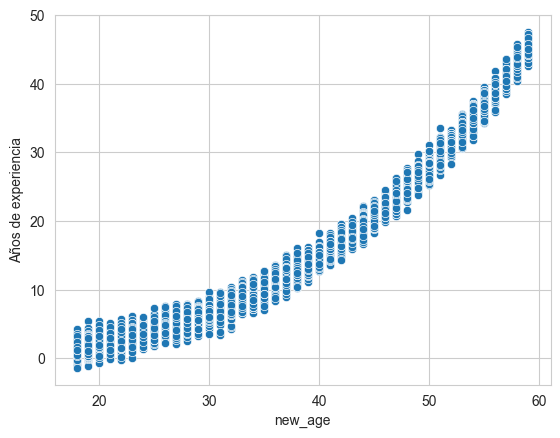

In [90]:
### Preprocesamiento NUESTRO de los datos
import numpy as np

df_train["new_age"] = np.random.choice([i for i in range(18, 60)], df_train.shape[0])

def datos_salario_por_edad(edades, salario_base, aumento_por_edad, aumento_abajo):
    salarios = []
    for edad in edades:
        # Genera un rango aleatorio entre el salario base y el salario base más el aumento
        rango_salario = np.random.uniform(salario_base + aumento_abajo*edad, salario_base + aumento_por_edad * edad)
        # Selecciona un salario aleatorio dentro del rango
        salario = np.random.uniform(rango_salario * 0.9, rango_salario)
        salarios.append(salario)
    return salarios



profession_transform = {
    "Executive": 13,
    "Lawyer": 10,
    "Doctor": 9,
    "Engineer": 6,
    "Healthcare": 5,
    "Entertainment": 4,
    "Marketing": 3,
    "Homemaker": 2,
    "Artist": 1
}
df_train["new_profession"] = df_train["Profession"].map(profession_transform)
df_train["Graduated"] = df_train["Graduated"].apply(lambda x: 1 if x=="Yes" else 0)
df_train["new_salario"] = pd.Series(datos_salario_por_edad(df_train["new_age"], 16000, 2000, 400))
df_train["new_salario"] = df_train[["new_salario", "new_profession", "Graduated"]].apply(lambda row: row["new_salario"] + 1000*row["new_profession"] + 5000*row["Graduated"], axis=1)

def new_work_experience(age):
    list_30_40 = [1, 2, 3, 4, 5]+ 3*[6] + 3*[7] + 3*[8] + 3*[9] + 3*[10]
    list_40_50 = 5*[11] + 5*[12] + 5*[13] + 5*[14] + 5*[15] + 5*[16] + 5*[17] + 5*[18]
    list_50_65 = 7*[19] + 7*[20] + 7*[21] + 7*[22] + 7*[23] + 7*[24] + 7*[25]
    if 20<=age<30:
        return np.random.choice([1, 2, 3, 4, 5])
    elif 30<=age<40:
        return np.random.choice(list_30_40)
    elif 40<=age<50:
        return np.random.choice(list_40_50)
    elif 50<=age<65:
        return np.random.choice(list_50_65)
    elif age>=65:
        return np.random.choice(8*[26] + 8*[27] + 8*[28])
    else:
        return 0


df_train["new_work_experience"] = df_train["new_age"].apply(new_work_experience)

x = df_train["new_age"]
y = 0.01*x + 0.001*x**2 + 0.0002*x**3+ np.random.randn(x.shape[0])
sns.scatterplot(x=x, y=y)
plt.ylabel("Años de experiencia")

In [100]:
def new_new_anos_experiencia(row):
    age = row["new_age"]
    grad = row["Graduated"]
    posibles_categorias = ["0-5", "5-10", "10-20", "+20"]
    if not grad:
        if 10<=age<=30:
            return np.random.choice(posibles_categorias, p=[0.6, 0.3, 0.1, 0])
        elif 30<age<=45:
            return np.random.choice(posibles_categorias, p=[0.05, 0.3, 0.5, 0.15])
        elif 45<age:
            return np.random.choice(posibles_categorias, p=[0.05, 0.2, 0.25, 0.5])
    elif grad:
        if 10<=age<=30:
            return np.random.choice(posibles_categorias, p=[0.7, 0.25, 0.05, 0])
        elif 30<age<=45:
            return np.random.choice(posibles_categorias, p=[0.1, 0.4, 0.4, 0.05])
        elif 45<age:
            return np.random.choice(posibles_categorias, p=[0.05, 0.2, 0.25, 0.5])
df_train["new_new_work_experience"] = df_train[["new_age", "Graduated"]].apply(new_new_anos_experiencia, axis=1)

In [101]:
df_train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,new_profession,new_work_experience,new_age,new_salario,new_new_work_experience
0,462809,Male,No,22,0,Healthcare,1.0,Low,4.0,Cat_4,D,5.0,5,24,37478.785391,0-5
1,462643,Female,Yes,38,0,Engineer,NaN,Average,3.0,Cat_4,A,6.0,11,45,40288.678177,10-20
2,466315,Female,Yes,67,0,Engineer,1.0,Low,1.0,Cat_6,B,6.0,18,45,53655.390267,10-20
3,461735,Male,Yes,67,0,Lawyer,0.0,High,2.0,Cat_6,B,10.0,6,30,55650.269159,0-5
4,462669,Female,Yes,40,0,Entertainment,NaN,High,6.0,Cat_6,A,4.0,8,32,62329.281815,5-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,0,NaN,0.0,Low,7.0,Cat_1,D,NaN,7,30,NaN,0-5
8064,464685,Male,No,35,0,Executive,3.0,Low,4.0,Cat_4,D,13.0,3,21,57619.681514,0-5
8065,465406,Female,No,33,0,Healthcare,1.0,Low,1.0,Cat_6,D,5.0,24,55,110958.847107,5-10
8066,467299,Female,No,27,0,Healthcare,1.0,Low,4.0,Cat_6,B,5.0,5,26,70349.856909,0-5


<Axes: xlabel='new_age', ylabel='None'>

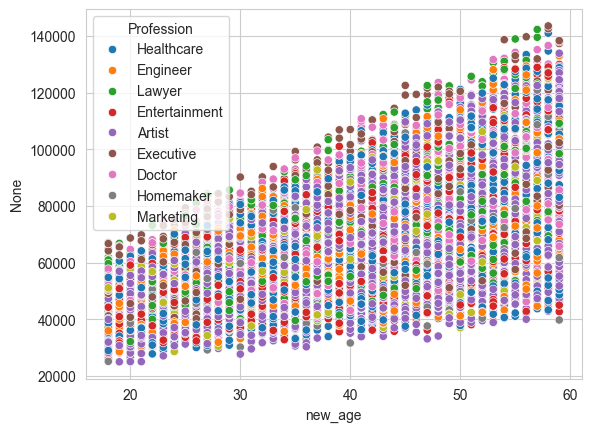

In [71]:
the_best_salario = df_train[["new_salario", "new_profession", "Graduated"]].apply(lambda row: row["new_salario"] + 1000*row["new_profession"] + 5000*row["Graduated"], axis=1)
sns.scatterplot(x=df_train["new_age"], y=the_best_salario, hue=df_train["Profession"])

<Axes: xlabel='new_age'>

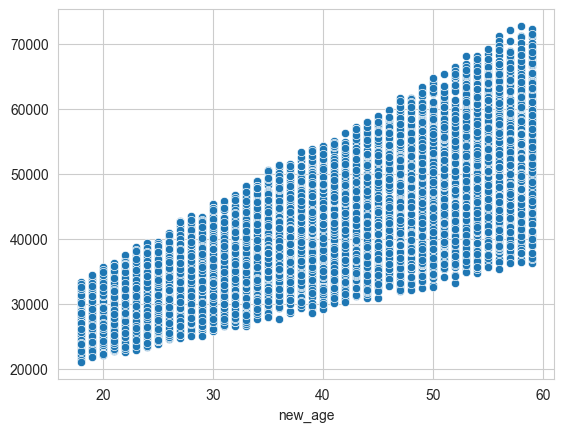

In [58]:
def datos_salario_por_edad(edades, salario_base, aumento_por_edad, aumento_abajo):
    salarios = []
    for edad in edades:
        # Genera un rango aleatorio entre el salario base y el salario base más el aumento
        rango_salario = np.random.uniform(salario_base + aumento_abajo*edad, salario_base + aumento_por_edad * edad)
        # Selecciona un salario aleatorio dentro del rango
        salario = np.random.uniform(rango_salario * 0.9, rango_salario)
        salarios.append(salario)
    return salarios

salarios = datos_salario_por_edad(df_train["new_age"], 16000, 1000, 400)
sns.scatterplot(x=df_train["new_age"], y=salarios)

In [47]:
df_train.drop(["new_profession"], axis="columns")

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,new_work_experience,new_age
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,15,51
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,8,53
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,3,28
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,4,29
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,5,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D,2,22
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D,6,30
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D,4,22
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B,10,51


<Axes: xlabel='Age', ylabel='Count'>

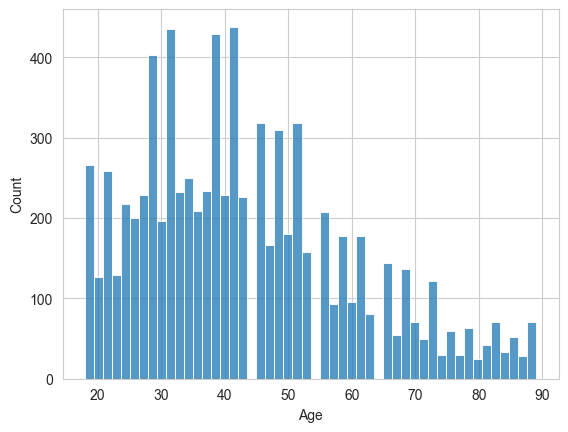

In [28]:
sns.histplot(df_train["Age"], bins=50)

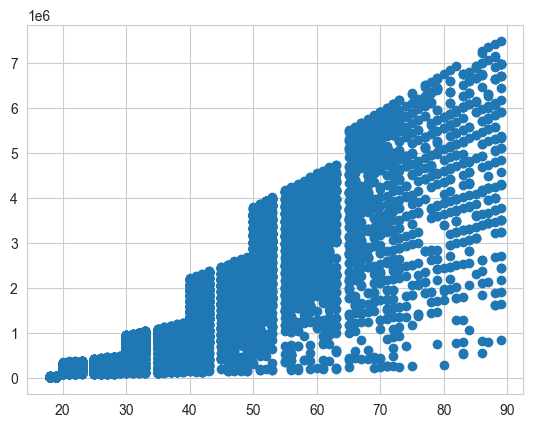

In [87]:
plt.scatter(X["Age"], y)

In [88]:
y.describe()

count    7.944000e+03
mean     1.620719e+06
std      1.542285e+06
min      4.293447e+03
25%      3.809813e+05
50%      1.025123e+06
75%      2.330558e+06
max      7.484706e+06
dtype: float64

In [62]:
df_train["Profession"].value_counts()

Profession
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: count, dtype: int64

In [63]:
df_train[df_train["Profession"] == "Homemaker"]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,new_work_experience
16,466865,Female,No,32,No,Homemaker,9.0,Low,5.0,Cat_3,D,1
20,466084,Male,Yes,49,Yes,Homemaker,12.0,Low,1.0,Cat_3,A,12
33,467010,Male,No,26,No,Homemaker,9.0,Low,NaN,Cat_6,D,4
69,467208,Female,Yes,39,Yes,Homemaker,NaN,High,2.0,Cat_6,A,6
75,463691,Female,No,33,No,Homemaker,0.0,Low,3.0,Cat_6,B,3
...,...,...,...,...,...,...,...,...,...,...,...,...
7879,463018,Female,No,40,Yes,Homemaker,9.0,Low,1.0,Cat_6,D,14
7991,462092,Female,Yes,35,Yes,Homemaker,7.0,Average,4.0,NaN,B,7
8003,462228,Female,No,29,No,Homemaker,0.0,Low,4.0,Cat_4,A,1
8040,467165,Female,No,25,No,Homemaker,NaN,Low,1.0,Cat_6,D,2


In [51]:
df_train.groupby("Var_1").describe().T

Var_1                              Cat_1          Cat_2          Cat_3  \
ID                  count     133.000000     422.000000     822.000000   
                    mean   463171.293233  463725.556872  462982.030414   
                    std      2624.441738    2433.618860    2483.273950   
                    min    459091.000000  459021.000000  459026.000000   
                    25%    460799.000000  461715.500000  460689.250000   
                    50%    463254.000000  463715.500000  462218.000000   
                    75%    465368.000000  466023.000000  465603.750000   
                    max    467917.000000  467959.000000  467859.000000   
Age                 count     133.000000     422.000000     822.000000   
                    mean       39.751880      37.476303      39.253041   
                    std        14.904446      13.982451      14.056237   
                    min        18.000000      18.000000      18.000000   
                    25%        28.000000      27.000000      28.000000   
                    50%        38.000000      36.000000      38.000000   
                    75%        48.000000      47.000000      48.000000   
                    max        73.000000      89.000000      87.000000   
Work_Experience     count     115.000000     388.000000     716.000000   
                    mean        1.991304       2.850515       2.536313   
                    std         2.951347       3.249858       3.253413   
                    min         0.000000       0.000000       0.000000   
                    25%         0.000000       0.000000       0.000000   
                    50%         1.000000       1.000000       1.000000   
                    75%         3.000000       5.000000       4.000000   
                    max        12.000000      14.000000      14.000000   
Family_Size         count     124.000000     410.000000     765.000000   
                    mean        3.040323       3.380488       2.904575   
                    std         1.433622       1.556314       1.490824   
                    min         1.000000       1.000000       1.000000   
                    25%         2.000000       2.000000       2.000000   
                    50%         3.000000       3.000000       3.000000   
                    75%         4.000000       4.000000       4.000000   
                    max         7.000000       9.000000       9.000000   
new_work_experience count     133.000000     422.000000     822.000000   
                    mean        9.436090       8.059242       8.867397   
                    std         7.224069       6.381297       6.578723   
                    min         0.000000       0.000000       0.000000   
                    25%         3.000000       3.000000       4.000000   
                    50%         8.000000       7.000000       8.000000   
                    75%        15.000000      11.000000      13.000000   
                    max        28.000000      28.000000      28.000000   

Var_1                              Cat_4          Cat_5          Cat_6  \
ID                  count    1089.000000      85.000000    5238.000000   
                    mean   463984.526171  463358.247059  463444.409317   
                    std      2031.417390    2166.656009    2710.315664   
                    min    458993.000000  459167.000000  458982.000000   
                    25%    462572.000000  461701.000000  461235.250000   
                    50%    464688.000000  463217.000000  463411.500000   
                    75%    465479.000000  464493.000000  465904.750000   
                    max    467974.000000  467912.000000  467973.000000   
Age                 count    1089.000000      85.000000    5238.000000   
                    mean       39.108356      37.164706      45.892707   
                    std        14.464244      13.464987      17.414960   
                    min        18.000000      18.000000      18.000000   
   

In [56]:
df_train[df_train["Var_1"]=="Cat_5"]["Segmentation"].value_counts()

Segmentation
D    28
B    20
A    19
C    18
Name: count, dtype: int64

In [58]:
df_train["Var_1"].value_counts()

Var_1
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

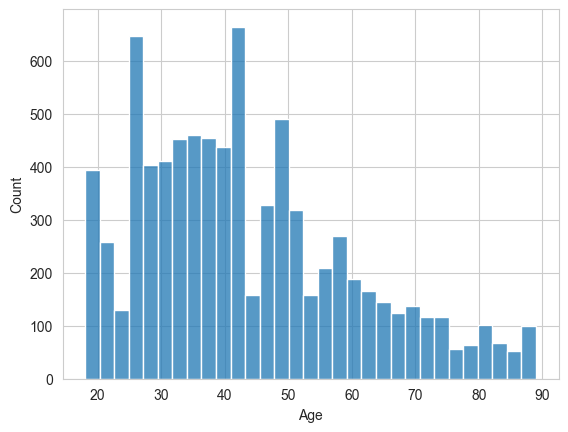

In [47]:
sns.histplot(df_train["Age"])

<Axes: xlabel='new_work_experience', ylabel='Count'>

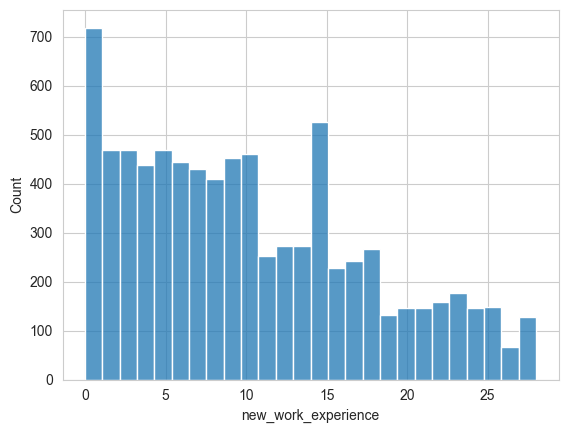

In [46]:
sns.histplot(df_train["new_work_experience"])

In [26]:
df_train.corr(numeric_only=True)

,ID,Age,Work_Experience,Family_Size,new_work_experience
ID,1.000000,-0.005055,-0.030688,0.011801,-0.002535
Age,-0.005055,1.000000,-0.190789,-0.280517,0.859630
Work_Experience,-0.030688,-0.190789,1.000000,-0.063234,-0.173654
Family_Size,0.011801,-0.280517,-0.063234,1.000000,-0.223924
new_work_experience,-0.002535,0.859630,-0.173654,-0.223924,1.000000


In [16]:
df_train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [12]:
df_train.groupby("Work_Experience")["Age"].mean()

Work_Experience
0.0     45.361519
1.0     46.173322
2.0     42.699301
3.0     41.756863
4.0     40.901186
5.0     39.113402
6.0     39.259804
7.0     39.464286
8.0     37.825054
9.0     37.780591
10.0    35.226415
11.0    38.420000
12.0    36.666667
13.0    35.869565
14.0    36.333333
Name: Age, dtype: float64

In [8]:
df_train["Profession"].value_counts()

Profession
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: count, dtype: int64

In [7]:
df_train["Segmentation"].value_counts()

Segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64

In [8]:
df_train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64